<a href="https://colab.research.google.com/github/christianhidber/easyagents/blob/master/jupyter_notebooks/intro_persistence.ipynb" 
    target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Saving & loading a trained policy

### Install packages (gym, tfagents, tensorflow,....)

#### suppress package warnings, in colab: load additional packages for rendering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import warnings

warnings.filterwarnings('ignore')
if 'google.colab' in sys.modules:
    !apt-get update >/dev/null
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start() 
else:
    #  for local installation
    sys.path.append('..')

#### install easyagents

In [2]:
if 'google.colab' in sys.modules:
    !pip install -q easyagents >/dev/null

## Saving & Loading

Use `agent.save(directory)` to save the current policy to `directory`.
If you omit directory, the policy is saved to a temp directory, if `directory` does not exist yet, it is created.
`save` returns the location of the saved policy.

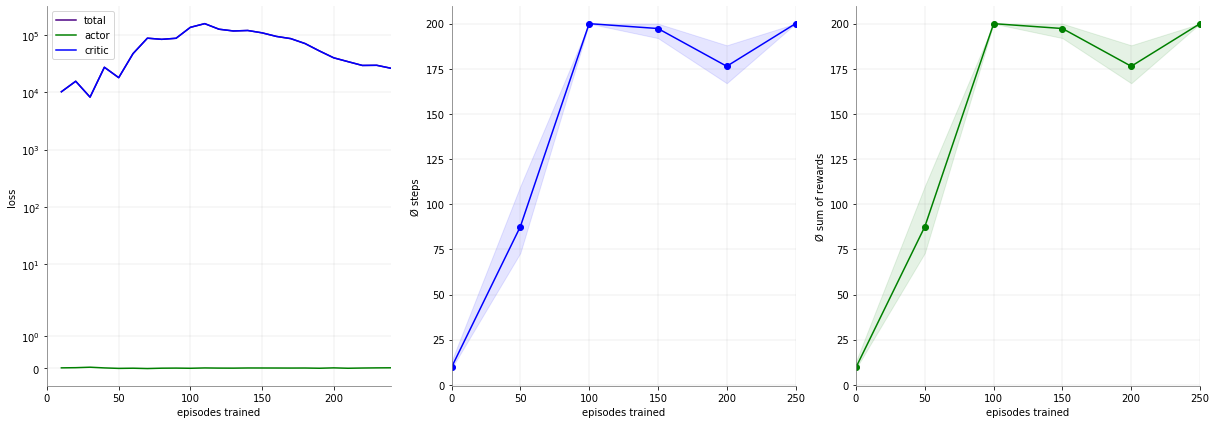

In [3]:
import os
import tempfile
from easyagents.agents import PpoAgent
from easyagents.callbacks import plot

ppoAgent = PpoAgent('CartPole-v0')
ppoAgent.train(num_iterations=25)

In [4]:
dir = tempfile.mkdtemp()
ppoAgent.save(directory=dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Temp\tmpgqsew3ns\policy\assets


'C:\\Temp\\tmpgqsew3ns'

Let's take a look at directory content:

In [5]:
os.listdir(dir)

['easyagent.json', 'policy']

The file `easyagent.json` contains the agent definition (type, model, backend & seed) while 
the `policy` directory contains the actual policy in a backend specific format.

To load a previously saved policy use `EasyAgent.load(directory)`. Once loaded you may directly call `play()`:

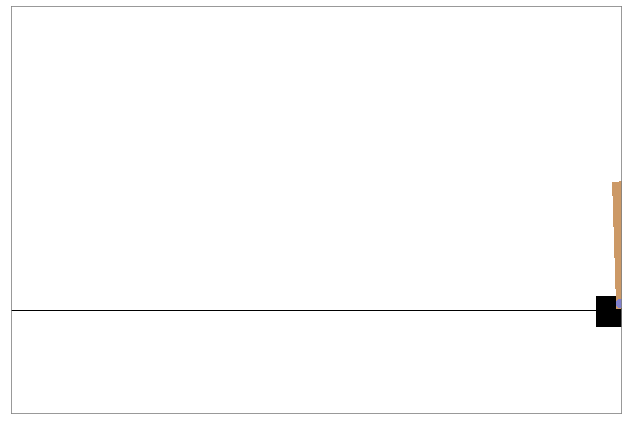

In [6]:
from easyagents.agents import load

ppoAgent = load(dir)
ppoAgent.play([plot.State()])

## Saving during training

To save intermediate versions of the agent during training use the `save.Best(...)` or `save.Every(...)` callbacks:

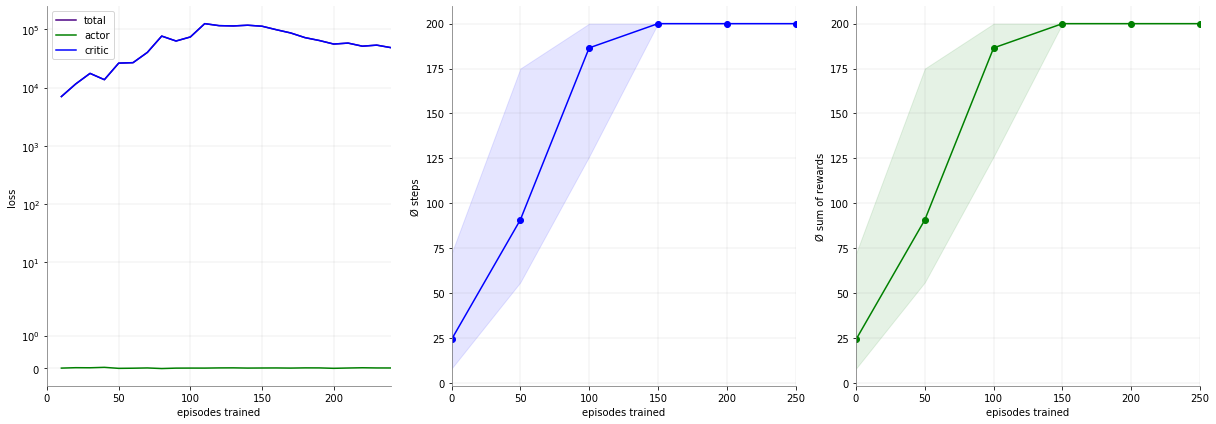

In [7]:
from easyagents.agents import PpoAgent
from easyagents.callbacks import save

ppoAgent = PpoAgent('CartPole-v0')
dir = tempfile.mkdtemp()
ppoAgent.train([save.Best(dir)], num_iterations=25)

`save.Best` saves an agent after evaluation, if the average reward is larger than all previous ones. 
If we don't pass a directory to the constructor, the agents are stored in a temp directory.
Let's take a look at the save policies:

In [8]:
os.listdir(dir)

['episode_0-avg_reward_24.2',
 'episode_100-avg_reward_186.5',
 'episode_150-avg_reward_200.0',
 'episode_50-avg_reward_90.8']

Note that each version is stored in a sub-directory reflecting the number of episodes trained as well as the 
achieved average reward. 

If you prefer saving a copy in a fixed interval, use `save.Every`:

In [9]:
dir = tempfile.mkdtemp()
ppoAgent.train([save.Every(directory=dir)], num_iterations=25)

In [10]:
os.listdir(dir)

['episode_0-avg_reward_9.7',
 'episode_100-avg_reward_197.3',
 'episode_150-avg_reward_181.7',
 'episode_200-avg_reward_198.8',
 'episode_250-avg_reward_200.0',
 'episode_50-avg_reward_113.8']

By default the policy is saved after each evaluation. To specify another frequency use the `num_evals_between_save`
parameter.

Note that the directory names again reflect the number of trained episodes as well as the average reward.
A save occurs every
````
num_evals_between_save * num_iterations_between_eval * num_iterations * num_episodes_per_iteration
````
episodes. All values are `agent.train(...)` parameters, except `num_evals_between_save`.